In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(2, 625)


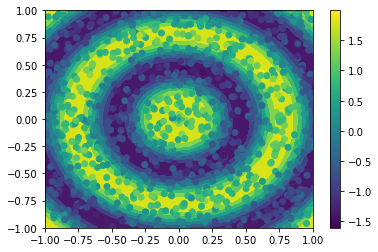

In [2]:
np.random.seed(4)
X = 2*np.random.rand(2,1000) - 1
Y = np.sin(10*np.linalg.norm(X,axis=0,keepdims=True)) + 0.25 * np.random.randn(1,1000)

X0,X1 = np.meshgrid(np.linspace(-1,1,25),np.linspace(-1,1,25))
X_grid = np.vstack([X0.ravel(),X1.ravel()])
print(X_grid.shape)
Y_sin = np.sin(10*np.linalg.norm(X_grid,axis=0,keepdims=True)) 

plt.contourf(X0,X1,Y_sin.reshape(X0.shape))
plt.scatter(X[0],X[1],c=Y)
plt.colorbar()

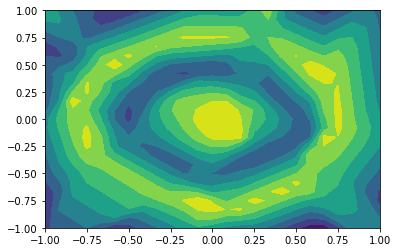

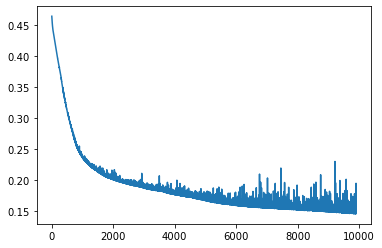

In [4]:
# hyperparameters
n = [10,10]
alpha = 0.01
lam = 0
m = 100

np.random.seed(5)
W1 = np.random.randn(n[0],X.shape[0])
b1 = np.zeros((n[0],1))

W2 = np.random.randn(n[1],n[0])
b2 = np.zeros((n[1],1))

W3 = np.random.randn(1,n[1])
b3 = np.zeros((1,1))

history = []

for step in range(10000):
    
    N = X.shape[1]
    shuffle = np.random.permutation(N)
    X_batches = []
    Y_batches = []
    count = 0
    while count < N:
        loc = shuffle[count:min(count+m,N)]
        X_batches.append(X[:,loc])
        Y_batches.append(Y[:,loc])
        count += m
        
    for X_batch,Y_batch in zip(X_batches,Y_batches):
    
        Z1 = np.dot(W1,X_batch) + b1
        H1 = Z1 * (Z1>0)
        Z2 = np.dot(W2,H1) + b2
        H2 = Z2 * (Z2 > 0)
        Z3 = np.dot(W3,H2) + b3

        # chain rule
        dZ3 = (2 / m) * (Z3 - Y_batch)
        dW3 = np.dot(dZ3,H2.T) + lam * 2 * W3
        db3 = np.sum(dZ3,axis=1,keepdims=True)

        dH2 = np.dot(W3.T,dZ3)

        dZ2 = dH2 * (H2>0)
        dW2 = np.dot(dZ2,H1.T) + lam * 2 * W2
        db2 = np.sum(dZ2,axis=1,keepdims=True)

        dH1 = np.dot(W2.T,dZ2)

        dZ1 = dH1 * (H1>0)
        dW1 = np.dot(dZ1,X_batch.T) + lam * 2 * W1
        db1 = np.sum(dZ1,axis=1,keepdims=True)

        W1 -= alpha * dW1
        b1 -= alpha * db1
        W2 -= alpha * dW2
        b2 -= alpha * db2
        W3 -= alpha * dW3
        b3 -= alpha * db3
    
    Z1 = np.dot(W1,X) + b1
    H1 = Z1 * (Z1>0)
    Z2 = np.dot(W2,H1) + b2
    H2 = Z2 * (Z2 > 0)
    Z3 = np.dot(W3,H2) + b3
    mse = np.mean((Z3-Y)**2)
    penalty = np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2)
    history.append(mse + lam * penalty)
    
Z1 = np.dot(W1,X_grid) + b1
H1 = Z1 * (Z1>0)
Z2 = np.dot(W2,H1) + b2
H2 = Z2 * (Z2 > 0)
Z3_grid = np.dot(W3,H2) + b3

plt.contourf(X0,X1,Z3_grid.reshape(X0.shape))
    
plt.figure()
plt.plot(history[100:])

In [7]:
import pandas as pd
ret = pd.read_csv('./data/CharAll_ret.csv').rename(columns = {'Unnamed: 0' : 'date'})
char = pd.read_csv('./data/CharAll_char.csv').rename(columns = {'Unnamed: 0' : 'date'})

In [10]:
df = ret.merge(char,on=['date','permno'])

Y = df['ret'].values.reshape(1,-1)
X = df.drop(columns=['ret','date','permno']).values.T
print(Y.shape)
print(X.shape)

(1, 1218555)
(46, 1218555)


In [17]:
train = (df['date'] < '1987-01-01').values
val = ((df['date']>= '1987-01-01') & (df['date']<'1997-01-01')).values
test = (df['date'] >= '1997-01-01').values

X_train, Y_train = X[:,train], Y[:,train]
X_val, Y_val = X[:,val], Y[:,val]
X_test, Y_test = X[:,test], Y[:,test]

epoch 1, loss: training 0.04253144, val 0.05331005
epoch 2, loss: training 0.02159011, val 0.03311844
epoch 3, loss: training 0.01901869, val 0.03063189
epoch 4, loss: training 0.01819395, val 0.02986090
epoch 5, loss: training 0.01776916, val 0.02943653
epoch 6, loss: training 0.01750708, val 0.02917744
epoch 7, loss: training 0.01732839, val 0.02896497
epoch 8, loss: training 0.01720075, val 0.02884207
epoch 9, loss: training 0.01710558, val 0.02871896
epoch 10, loss: training 0.01702007, val 0.02864551
epoch 11, loss: training 0.01698413, val 0.02863561
epoch 12, loss: training 0.01691448, val 0.02851291
epoch 13, loss: training 0.01687301, val 0.02850489
epoch 14, loss: training 0.01682782, val 0.02842812
epoch 15, loss: training 0.01680257, val 0.02838848
epoch 16, loss: training 0.01677449, val 0.02837167
epoch 17, loss: training 0.01674982, val 0.02835050
epoch 18, loss: training 0.01673445, val 0.02833565
epoch 19, loss: training 0.01671917, val 0.02832318
epoch 20, loss: train

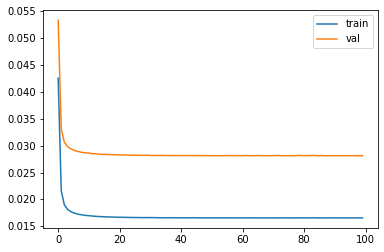

In [21]:
# hyperparameters
n = [10,10]
alpha = 0.01
lam = 0
m = 1000

np.random.seed(5)
W1 = np.random.randn(n[0],X.shape[0])
b1 = np.zeros((n[0],1))

W2 = np.random.randn(n[1],n[0])
b2 = np.zeros((n[1],1))

W3 = np.random.randn(1,n[1])
b3 = np.zeros((1,1))

history_train = []
history_val = []

for step in range(100):
    
    N = X_train.shape[1]
    shuffle = np.random.permutation(N)
    X_batches = []
    Y_batches = []
    count = 0
    while count < N:
        loc = shuffle[count:min(count+m,N)]
        X_batches.append(X_train[:,loc])
        Y_batches.append(Y_train[:,loc])
        count += m
        
    for X_batch,Y_batch in zip(X_batches,Y_batches):
    
        Z1 = np.dot(W1,X_batch) + b1
        H1 = Z1 * (Z1>0)
        Z2 = np.dot(W2,H1) + b2
        H2 = Z2 * (Z2 > 0)
        Z3 = np.dot(W3,H2) + b3

        # chain rule
        dZ3 = (2 / m) * (Z3 - Y_batch)
        dW3 = np.dot(dZ3,H2.T) + lam * 2 * W3
        db3 = np.sum(dZ3,axis=1,keepdims=True)

        dH2 = np.dot(W3.T,dZ3)

        dZ2 = dH2 * (H2>0)
        dW2 = np.dot(dZ2,H1.T) + lam * 2 * W2
        db2 = np.sum(dZ2,axis=1,keepdims=True)

        dH1 = np.dot(W2.T,dZ2)

        dZ1 = dH1 * (H1>0)
        dW1 = np.dot(dZ1,X_batch.T) + lam * 2 * W1
        db1 = np.sum(dZ1,axis=1,keepdims=True)

        W1 -= alpha * dW1
        b1 -= alpha * db1
        W2 -= alpha * dW2
        b2 -= alpha * db2
        W3 -= alpha * dW3
        b3 -= alpha * db3
    
    
    Z1 = np.dot(W1,X_train) + b1
    H1 = Z1 * (Z1>0)
    Z2 = np.dot(W2,H1) + b2
    H2 = Z2 * (Z2 > 0)
    Z3 = np.dot(W3,H2) + b3
    mse = np.mean((Z3-Y_train)**2)
    penalty = np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2)
    history_train.append(mse + lam * penalty)
    
    Z1 = np.dot(W1,X_val) + b1
    H1 = Z1 * (Z1>0)
    Z2 = np.dot(W2,H1) + b2
    H2 = Z2 * (Z2 > 0)
    Z3 = np.dot(W3,H2) + b3
    mse = np.mean((Z3-Y_val)**2)
    penalty = np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2)
    history_val.append(mse + lam * penalty)

    print('epoch %d, loss: training %.8f, val %.8f' % (1+step,history_train[-1],history_val[-1]))
    
    
plt.figure()
plt.plot(history_train)
plt.plot(history_val)
plt.legend(['train','val'])

In [22]:
Z1 = np.dot(W1,X_test) + b1
H1 = Z1 * (Z1>0)
Z2 = np.dot(W2,H1) + b2
H2 = Z2 * (Z2 > 0)
Z3 = np.dot(W3,H2) + b3
mse = np.mean((Z3-Y_test)**2)
mse0 = np.mean(Y_test**2)
r2oos = (1 - mse / mse0)*100
print(r2oos)

0.4061850047653248


In [23]:
W1.shape

(10, 46)

In [24]:
W2.shape

(10, 10)

In [26]:
W3.shape

(1, 10)

In [27]:
df

,date,permno,ret,A2ME,AC,AT,ATO,BEME,Beta,C,...,Resid_Var,RNA,ROA,ROE,S2P,SGA2S,Spread,ST_REV,SUV,Variance
0,1967-01-01,10006,0.136223,0.108392,0.243590,0.152681,-0.182984,0.113054,0.185315,0.113054,...,-0.224942,0.045455,0.059441,0.080420,-0.015152,-0.383450,-0.164336,-0.241259,-0.325175,-0.182984
1,1967-01-01,10014,0.317129,0.455711,-0.360140,-0.472028,0.257576,0.453380,0.318182,0.122378,...,0.483683,0.038462,-0.346154,-0.245921,0.439394,-0.175991,0.439394,-0.399767,-0.064103,0.483683
2,1967-01-01,10102,0.101064,0.050117,0.050117,0.206294,-0.276224,0.096737,0.068765,-0.294872,...,-0.129371,-0.145688,-0.136364,-0.134033,-0.108392,0.001166,0.115385,0.500000,0.273893,0.026807
3,1967-01-01,10145,0.287367,-0.031469,0.019814,0.416084,-0.252914,0.005828,-0.297203,-0.493007,...,-0.460373,-0.136364,-0.059441,-0.099068,-0.173660,-0.178322,0.024476,-0.001166,0.378788,-0.357809
4,1967-01-01,10153,0.143427,0.371795,0.497669,0.280886,-0.175991,0.362471,0.325175,-0.346154,...,0.071096,-0.278555,-0.392774,-0.383450,0.299534,-0.189977,0.292541,0.152681,-0.304196,0.248252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218550,2016-12-01,93373,-0.194911,-0.154244,0.030538,-0.042443,0.385093,-0.045549,-0.096273,0.137164,...,-0.024327,0.377329,0.295549,0.302795,0.179089,0.085921,0.036749,0.140269,0.085404,-0.098344
1218551,2016-12-01,93397,0.201762,0.043996,0.008799,-0.265010,-0.316253,0.074534,0.038302,-0.493789,...,-0.115942,-0.260352,-0.067805,-0.087992,-0.240166,-0.176501,-0.078675,-0.396480,0.353002,-0.216356
1218552,2016-12-01,93399,0.002213,0.086439,-0.375259,-0.382505,0.201863,0.197205,-0.313665,0.379917,...,0.384058,-0.392340,-0.333851,-0.309006,0.218426,0.451346,0.363354,0.158903,-0.072981,0.349896
1218553,2016-12-01,93422,-0.063881,0.321429,0.387681,0.307453,-0.377329,0.370600,0.447723,-0.220497,...,0.208075,-0.349896,-0.248447,-0.244824,-0.036232,-0.332298,0.180124,0.379400,-0.472050,0.313665
